# Prep Course Capstone Project

## Data

TMDB Dataset found at:
https://www.kaggle.com/tmdb/tmdb-movie-metadata

This Dataset from The Movie Database contains information on almost 5,000 films from 1916 to 2017.  Features include numeric variables like budget and revenue, as well as categorical variables like genre and language.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
%matplotlib inline

In [2]:
movies = pd.read_csv('~/Desktop/Data_Science/tmdb/tmdb_5000_movies.csv')

In [3]:
movies.shape

(4803, 20)

4803 films are listed with information in 12 columns.  First, we'll remove some columns beyond the scope of this project to focus on some elements.

In [4]:
#Remove some columns beyond the scope of this project
movies = movies.drop(['homepage', 'id', 'overview', 'original_title', 'keywords', 'production_companies', 'production_countries', 'runtime', 'status', 'tagline'], axis=1)
movies.head()

,budget,genres,original_language,popularity,release_date,revenue,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124


In [5]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000


Now we can focus on some select columns.  The financial aspects of these films are conveyed by looking at budget and revenue.  Genre will be used to establish some simple descriptions of the films.  When combined with release date, we can look at this information over time.

### Release Year

To make more concise use of the release date, we'll extract the year.  Then we can explore films by release year.

In [6]:
#create method to extract year from release date
def ExtractYear(val):
    tokens = val.split('-')
    return tokens[0]

#streamline release date data to string
movies['release_date'] = movies['release_date'].astype(str)

#apply year extraction method to release date
movies['release_year'] = movies['release_date'].apply(ExtractYear)

#turn release year data into numbers
movies['release_year'] = pd.to_numeric(movies['release_year'], errors='coerce', downcast='integer')

In [7]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count,release_year
count,4.803000e+03,4803.000000,4.803000e+03,4803.000000,4803.000000,4802.000000
mean,2.904504e+07,21.492301,8.226064e+07,6.092172,690.217989,2002.468763
std,4.072239e+07,31.816650,1.628571e+08,1.194612,1234.585891,12.414354
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1916.000000
25%,7.900000e+05,4.668070,0.000000e+00,5.600000,54.000000,1999.000000
50%,1.500000e+07,12.921594,1.917000e+07,6.200000,235.000000,2005.000000
75%,4.000000e+07,28.313505,9.291719e+07,6.800000,737.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,2017.000000


The earliest record is from 1916, with very few films (about 250) from 1916 through the 5th quantile, so we'll leave those out.

In [8]:
movies = movies[movies['release_year'] > movies['release_year'].quantile(0.05)]

In [9]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count,release_year
count,4.550000e+03,4550.000000,4.550000e+03,4550.000000,4550.000000,4550.000000
mean,3.036340e+07,21.680558,8.453674e+07,6.049802,704.043077,2004.621319
std,4.138421e+07,32.222683,1.658643e+08,1.193490,1252.162604,8.003167
min,0.000000e+00,0.001186,0.000000e+00,0.000000,0.000000,1980.000000
25%,8.700000e+05,4.808317,0.000000e+00,5.600000,55.000000,2000.000000
50%,1.500000e+07,13.247682,1.984224e+07,6.200000,242.000000,2006.000000
75%,4.000000e+07,28.562784,9.605755e+07,6.800000,755.000000,2011.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,2017.000000


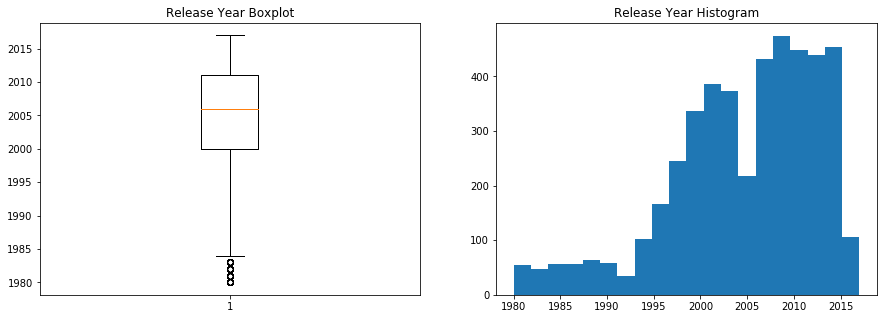

In [10]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(movies['release_year'].dropna(how = 'any'))
plt.title('Release Year Boxplot')

plt.subplot(1, 2, 2)
plt.hist(movies['release_year'].dropna(how = 'any'), bins=20)
plt.title('Release Year Histogram')

plt.show()

Now we are better able to see our release year data by starting with information from 1980.  We can see an increase in film listings from the mid-1990s to early 2000s, then a fairly steady number from there (less a momentary dip in the mid-2000s)

### Genres

First we need to access the individual genres in the genre column for each film and compile a list of all genres.

In [11]:
import ast

#create method to extract individual genres from genres column
def ExtractGenreAsList(dictionary_genre):
    dictionary_genre = ast.literal_eval(dictionary_genre)
    list_genres = []
    for entry in dictionary_genre:
        list_genres.append(entry['name'])
    return list_genres

#apply genre extraction method to genres column
movies["genre_list"] = movies["genres"].apply(ExtractGenreAsList)

In [12]:
#extract unique genres from genre list column
unique_genres = []
for row in movies["genre_list"]:
    for genres in row:
        unique_genres.append(genres)
unique_genres = set(unique_genres)       

#create a new sorted list from the set of unique genres
genre_list = []
for genre in unique_genres:
    genre_list.append(genre)
genre_list.sort()
print(genre_list)

['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


We find twenty unique genres.  So now let's record whether each genre applies to each film.  Here we'll use a simple numerical boolean by genre for each film.

In [13]:
#create method to identify which genre column names are listed for each film (row)
def GetGenrePerRow(row, genre):
    if genre in row:
        return 1
    else:
        return 0
    
#apply genre method to genre list column
for genre in genre_list:
    movies[genre] = movies["genre_list"].apply(lambda x: GetGenrePerRow(x, genre))

In [14]:
movies.head()

,budget,genres,original_language,popularity,release_date,revenue,spoken_languages,title,vote_average,vote_count,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,150.437577,2009-12-10,2787965087,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,...,0,0,0,0,0,1,0,0,0,0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,139.082615,2007-05-19,961000000,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,...,0,0,0,0,0,0,0,0,0,0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,107.376788,2015-10-26,880674609,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,...,0,0,0,0,0,0,0,0,0,0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,112.312950,2012-07-16,1084939099,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,...,0,0,0,0,0,0,0,1,0,0
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,43.926995,2012-03-07,284139100,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,...,0,0,0,0,0,1,0,0,0,0


In [15]:
#get list of total appearances of each genre
genre_count = pd.DataFrame(index = genre_list)
total_list = []
for genre in genre_list:
    total = movies[genre].sum()
    total_list.append(total)

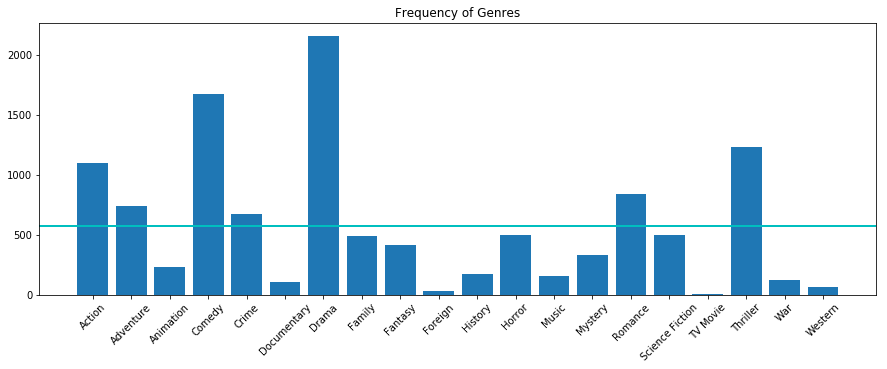

Genre Mean:  575.65


In [16]:
plt.figure(figsize=(15, 5))
plt.bar(genre_list, total_list)
plt.xticks(rotation = 45)
plt.axhline(np.mean(total_list), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.title('Frequency of Genres')
plt.show()
print('Genre Mean: ', np.mean(total_list))

This bar chart displays the variation in frequency of appearance for the twenty genres.  Seven genres - Drama, Comedy, Thriller, Action, Romance, Adventure and Crime - appear with greater frequency than the mean.

### Budget

The budget describes the financial investment in each film - what it cost to produce.  While there are other costs associated with the release of a film (like marketing), budget provides a representation of the cost of each film.

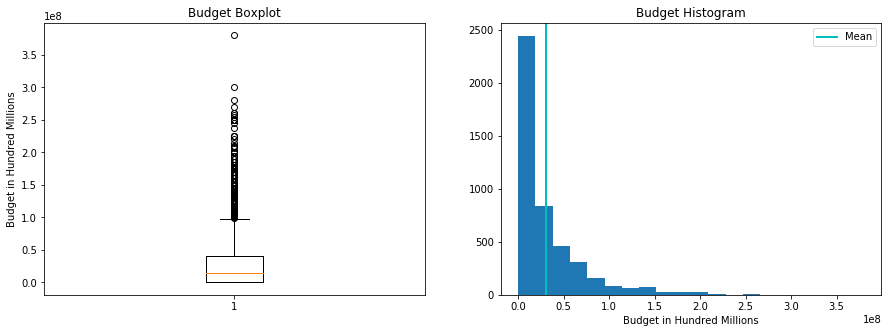

Budget Mean:  30363396.80043956


In [17]:
#budget

budget = movies['budget']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(budget)
plt.title('Budget Boxplot')
plt.ylabel('Budget in Hundred Millions')

plt.subplot(1, 2, 2)
plt.hist(budget, bins=20)
plt.title('Budget Histogram')
plt.axvline(budget.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.xlabel('Budget in Hundred Millions')
plt.legend(loc='upper right') 

plt.show()
print('Budget Mean: ', budget.mean())

We can see that the budget is heavily skewed to the right, with a much larger number of films (nearly 75% of those listed) with budgets well less than the mean of $30 million.

### Revenue

Although the source of this dataset does not provide details about how the revenue values are collected (domestic gross? international?), it still providesa guide to the financial success of each film.

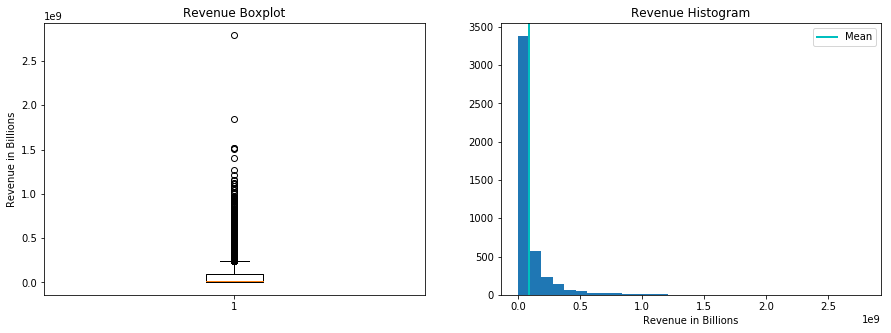

Revenue Mean:  84536737.40813187


In [18]:
#revenue

revenue = movies['revenue']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.boxplot(revenue)
plt.title('Revenue Boxplot')
plt.ylabel('Revenue in Billions')

plt.subplot(1, 2, 2)
plt.hist(revenue, bins=30)
plt.title('Revenue Histogram')
plt.axvline(revenue.mean(), color='c', linestyle='solid', linewidth=2, label="Mean")
plt.legend(loc='upper right') 
plt.xlabel('Revenue in Billions')

plt.show()
print('Revenue Mean: ', revenue.mean())

Like budget, the revenue data is also right skewed.  Here we see most films (again almost 75%) fall below the mean of $84.5 million.

## Questions

### Question 1: How has frequency of genres changed over time?

First we take a slice of the dataset so we're just dealing with the individual columns for each genre and the year of release

In [23]:
genre_info = movies.iloc[:, 10:]
genre_info.describe()

,release_year,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,...,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000,4550.000000
mean,2004.621319,0.240879,0.162637,0.050330,0.366813,0.146813,0.023736,0.474066,0.108132,0.090769,...,0.037582,0.109451,0.034286,0.072967,0.183736,0.109890,0.001538,0.269890,0.026154,0.013407
std,8.003167,0.427664,0.369075,0.218648,0.481988,0.353958,0.152243,0.499382,0.310581,0.287312,...,0.190205,0.312238,0.181982,0.260111,0.387312,0.312787,0.039197,0.443951,0.159610,0.115021
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2006.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,2017.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
genre_agg = genre_info.groupby('release_year').aggregate(np.sum)
genre_agg.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1980.0,5,3,0,6,1,0,9,0,2,0,3,3,3,1,2,5,0,3,0,2
1981.0,9,10,1,8,3,0,10,2,2,0,5,5,0,2,4,4,0,8,3,1
1982.0,8,6,0,6,2,0,8,2,5,0,1,8,0,2,2,8,0,7,1,1
1983.0,7,7,0,5,3,0,10,1,3,0,1,3,2,1,5,6,0,8,0,2
1984.0,12,7,0,9,6,0,10,2,6,0,3,7,3,1,3,8,0,7,0,0


In [25]:
genre_agg.describe()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,28.842105,19.473684,6.026316,43.921053,17.578947,2.842105,56.763158,12.947368,10.868421,0.868421,4.500000,13.105263,4.105263,8.736842,22.000000,13.157895,0.184211,32.315789,3.131579,1.605263
std,18.871581,12.290926,5.916020,33.683248,12.413227,3.605749,44.179263,10.682007,6.921065,1.234001,3.462151,9.545876,3.689206,7.831621,17.921752,8.741100,0.562584,23.269404,2.839595,1.603029
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.250000,9.000000,0.250000,11.000000,4.000000,0.000000,11.000000,4.000000,4.250000,0.000000,1.250000,6.000000,1.000000,1.250000,5.000000,5.000000,0.000000,9.000000,1.000000,0.250000
50%,25.000000,17.500000,4.000000,37.500000,20.000000,1.000000,55.000000,9.000000,10.000000,0.000000,4.000000,9.500000,3.000000,6.000000,21.000000,12.000000,0.000000,31.500000,2.500000,1.000000
75%,46.000000,31.500000,11.000000,81.500000,28.750000,6.500000,98.500000,21.500000,16.000000,2.000000,7.750000,20.750000,7.000000,15.000000,38.750000,19.000000,0.000000,53.000000,4.750000,2.000000
max,58.000000,40.000000,17.000000,97.000000,37.000000,10.000000,133.000000,35.000000,25.000000,4.000000,13.000000,33.000000,12.000000,28.000000,57.000000,32.000000,2.000000,69.000000,11.000000,7.000000


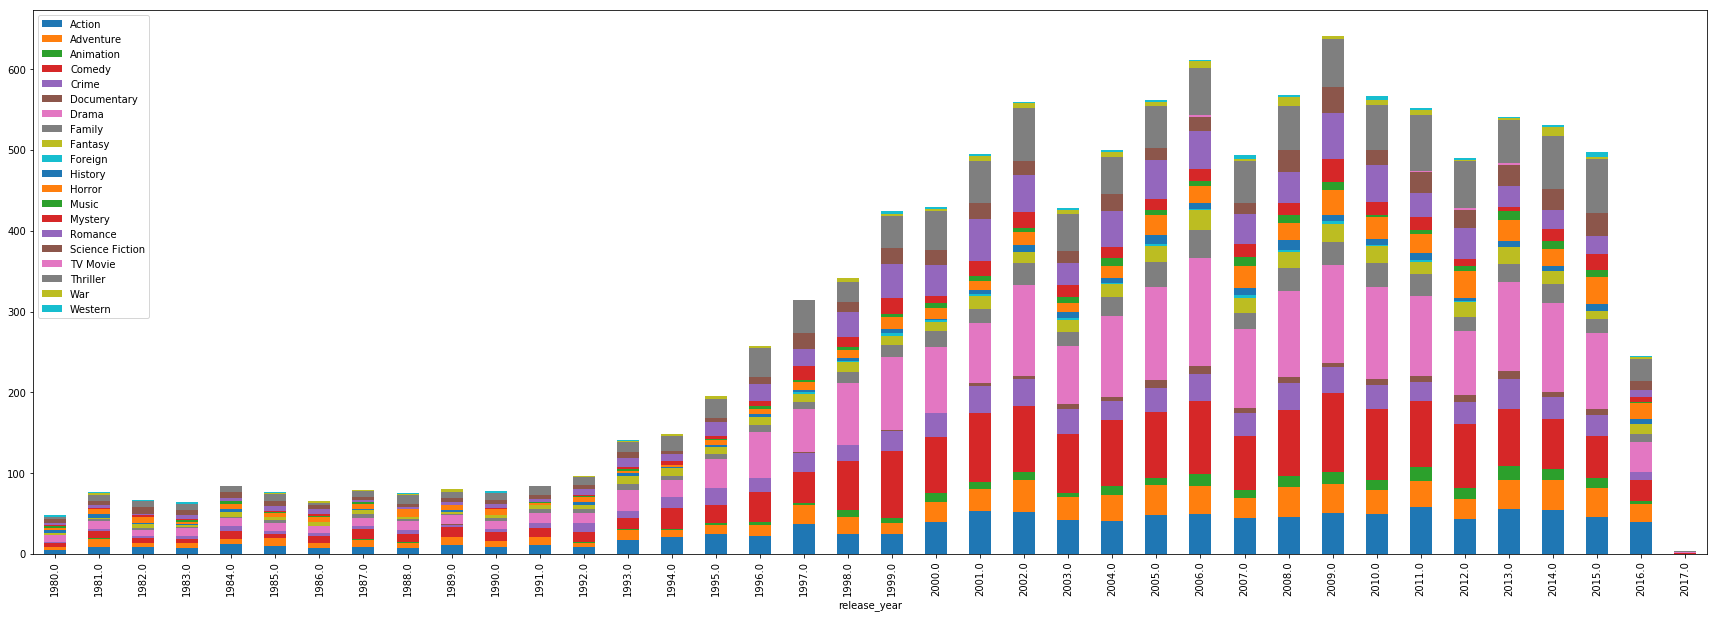

In [26]:
genre_agg.plot.bar(stacked='true', figsize=(30,10))

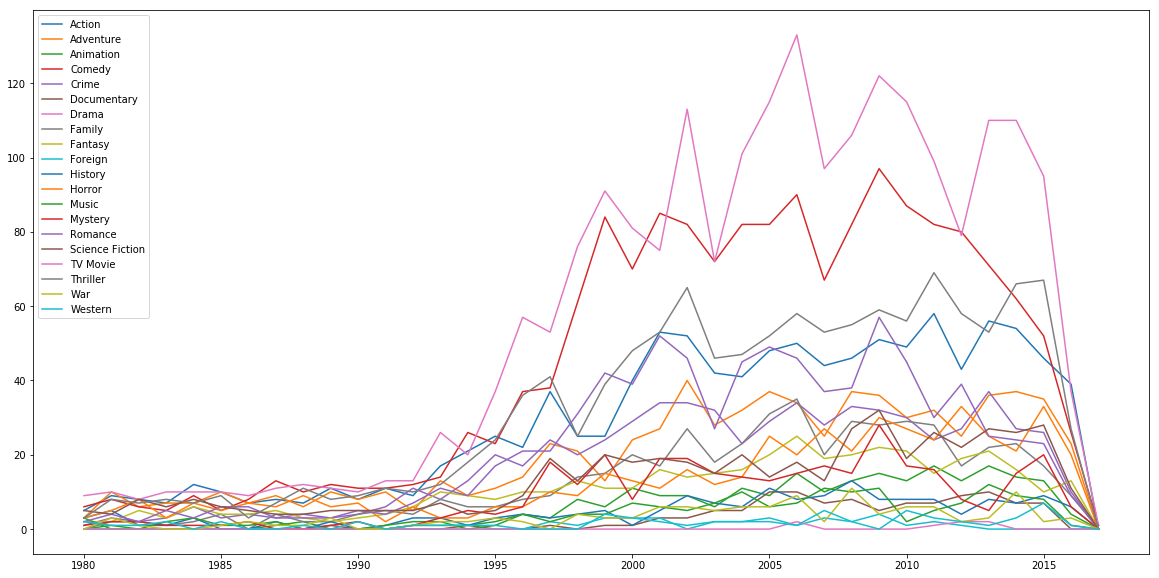

In [27]:
plt.figure(figsize=(20, 10))
plt.plot(genre_agg)
plt.legend(genre_list, loc='upper left')
plt.show()

Here we see representations of each genre over time.  The bar and line graphs provide a visual comparison of each genre over time.  We can see that the frequency of Drama films has remained steadily among the highest of all genres, but it is interesting to see how the rank of genres has varied over the years.
Action surged to most common in 1984. 
Comedy surged to the lead in 1994 and 2001, and again to a lesser extent in 2003 and 2012.
Romance and Science Fiction peaked in 2009, both more than doubling their mean frequency.

### Question Two: Does budget impact profitablity?

First we need to create a metric for profitability.  We can do this by subtracting the budget of a film from it's revenue and calling that value profit.

In [28]:
#remove any films not listing revenue information
money = movies[movies.revenue != 0]

#remove any films not listing budget information
money = money[money.budget != 0]

#create new feature of profit by subtracting budget from revenue
money['profit'] = money['revenue'] - money['budget']

In [29]:
money[['budget', 'revenue', 'profit']].describe()

,budget,revenue,profit
count,3.026000e+03,3.026000e+03,3.026000e+03
mean,4.294318e+07,1.259592e+08,8.301604e+07
std,4.486826e+07,1.900894e+08,1.614368e+08
min,7.000000e+00,5.000000e+00,-1.657101e+08
25%,1.280150e+07,1.857764e+07,-1.930338e+05
50%,2.800000e+07,5.949429e+07,2.838447e+07
75%,6.000000e+07,1.521287e+08,1.006364e+08
max,3.800000e+08,2.787965e+09,2.550965e+09


0.7084845510071505

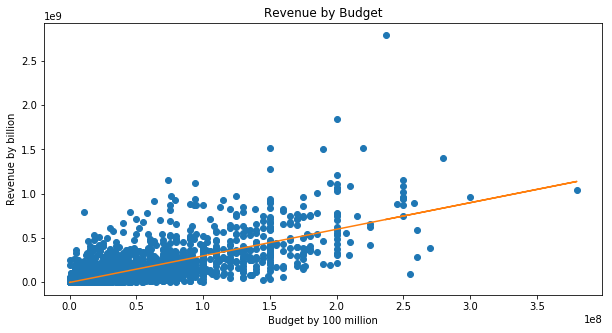

In [30]:
from scipy import stats

xi = money['budget']

# (Almost) linear sequence
y = money['revenue']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.figure(figsize=(10, 5))
plt.plot(xi,y,'o', xi, line)
ax = plt.gca()
fig = plt.gcf()
plt.title('Revenue by Budget')
plt.xlabel('Budget by 100 million')
plt.ylabel('Revenue by billion')

money['budget'].corr(money['revenue'], method='pearson')

With a Pearson value of 0.7, we see a correlation between budget and revenue - as budget increases, so does revenue.

But does this correlation hold when we account for the budget by looking at our profit variable?

0.5562991098895639

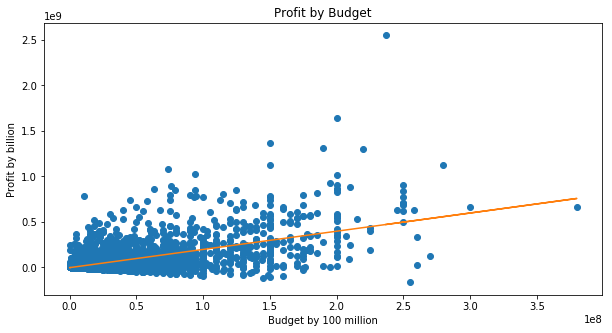

In [31]:
from scipy import stats

xi = money['budget']

# (Almost) linear sequence
y = money['profit']

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept

plt.figure(figsize=(10, 5))
plt.plot(xi,y,'o', xi, line)
ax = plt.gca()
fig = plt.gcf()
plt.title('Profit by Budget')
plt.xlabel('Budget by 100 million')
plt.ylabel('Profit by billion')

money['budget'].corr(money['profit'], method='pearson')

Here we see a reduced Pearson value - 0.56 instead of 0.7 - quantifying that while revenues increase with budgets, the cost of those increased budgets reduces the strength of that correlation.  Now we account for a negative financial standing for films that lost money, so it makes sense that our fit plot would angle lower.

### Question Three: Has profitability changed over time?

In [36]:
money.groupby(['release_year']).mean()[['budget', 'revenue', 'profit']]

,budget,revenue,profit
release_year,,,
1980.0,1.700000e+07,8.068640e+07,6.368640e+07
1981.0,1.317083e+07,5.478869e+07,4.161786e+07
1982.0,1.445294e+07,1.081284e+08,9.367542e+07
1983.0,1.918900e+07,8.634209e+07,6.715309e+07
1984.0,1.510208e+07,7.307117e+07,5.796909e+07
1985.0,1.393503e+07,7.670604e+07,6.277101e+07
1986.0,1.531667e+07,8.343850e+07,6.812183e+07
1987.0,1.704286e+07,7.415863e+07,5.711577e+07
1988.0,1.347500e+07,6.805015e+07,5.457515e+07


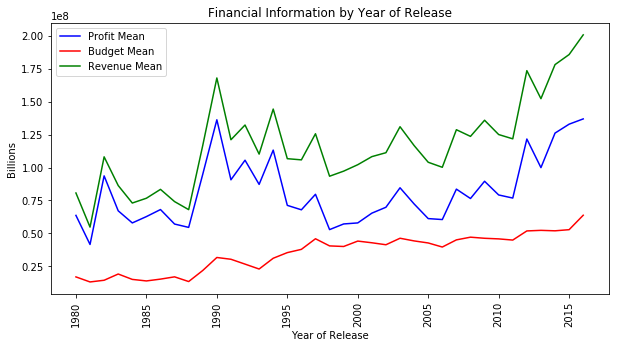

In [37]:
plt.figure(figsize=(10, 5))

money.groupby(['release_year']).mean()['profit'].plot(color='b', label="Profit Mean")
money.groupby(['release_year']).mean()['budget'].plot(color='red', label="Budget Mean")
money.groupby(['release_year']).mean()['revenue'].plot(color='green', label="Revenue Mean")
plt.xticks(rotation = 90)
plt.legend(loc='upper left')
plt.title('Financial Information by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Billions')

plt.show()

This chart shows the mean values by year for budget, revenue and profit.

Budgets show a fairly steady increase over the years - significant jumps in budget occur between 1988 and 1990, then again between 1993 and 1997.

In those same surge time frames, the revenue and profit means do not correspondingly surge.  1988 to 1990 saw large increases in revenue and profit - revenue jumped from $68 million to $1.68 billion and profit more than doubled from $54 million to $1.36 billion.  But from 1993 to 1997, revenue saw only modest gains (from $1.1 billion to $1.26 billion) and profits decreased (from $87 million to $80 million)

It would seem that although there is a correlation between budget and profit, it is still possible to increase budgets beyond what the market will return.

In [34]:
#aggregate to new decade column
money['decade'] = 'other'
money.loc[money['release_year']<1990, 'decade'] = '1980s'
money.loc[(money['release_year']>1989) & (money['release_year']<2000), 'decade'] = '1990s'
money.loc[(money['release_year']>1999) & (money['release_year']<2010), 'decade'] = '2000s'
money.loc[money['release_year']>2009, 'decade'] = '2010s'

In [35]:
money[['decade','budget','revenue','profit']].groupby('decade').describe()

budget                                                                 \
         count          mean           std       min          25%         50%   
decade                                                                          
1980s    204.0  1.601214e+07  1.311311e+07  160000.0   5839000.00  13900000.0   
1990s    540.0  3.700033e+07  3.132222e+07       7.0  12662714.75  28500000.0   
2000s   1335.0  4.393239e+07  4.196945e+07       7.0  15000000.00  30000000.0   
2010s    947.0  5.073883e+07  5.584693e+07      10.0  13000000.00  30000000.0   

                                 profit                    ...       \
               75%          max   count          mean      ...        
decade                                                     ...        
1980s   22175000.0   70000000.0   204.0  6.530056e+07      ...        
1990s   55000000.0  200000000.0   540.0  7.586292e+07      ...        
2000s   60000000.0  300000000.0  1335.0  7.217496e+07      ...        
2010s   66000000.0  380000000.0   947.0  1.061940e+08      ...        

                                  revenue                              \
                75%           max   count          mean           std   
decade                                                                  
1980s    75680886.5  7.824106e+08   204.0  8.131270e+07  1.138914e+08   
1990s   104048980.0  1.645034e+09   540.0  1.128633e+08  1.573576e+08   
2000s    84784336.0  2.550965e+09  1335.0  1.161074e+08  1.788926e+08   
2010s   122928322.5  1.363529e+09   947.0  1.569328e+08  2.278147e+08   

                                                                      
             min          25%         50%          75%           max  
decade                                                                
1980s   354704.0  17931609.00  38581000.5   90100073.5  7.929106e+08  
1990s        5.0  14692080.25  50712093.5  159341537.0  1.845034e+09  
2000s        7.0  19283106.50  57223890.0  134115091.0  2.787965e+09  
2010s       11.0  21136272.50  74188937.0  184878941.5  1.519558e+09  

[4 rows x 24 columns]

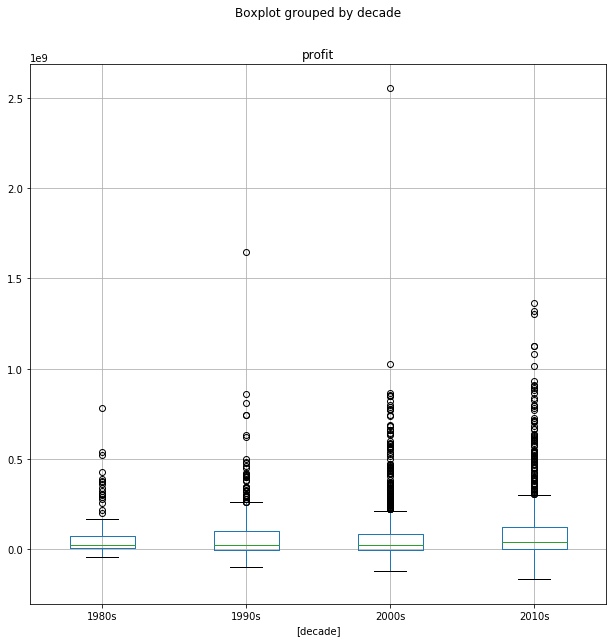

In [38]:
money[['decade', 'profit']].boxplot(by='decade', figsize=(10,10))


These boxplots by decade shows the increasing profits, but also show that those increases come with increased potential for loss (growing tails in the negative).  These boxplots also show that while there are many outliers greater than the inner quartile range, there are no outliers below - losses are not outside.

So, how does a comparision of profits by decade illuminate this topic?

In [39]:
money80 = money.loc[money['decade'] == '1980s']
money90 = money.loc[money['decade'] == '1990s']
money00 = money.loc[money['decade'] == '2000s']
money10 = money.loc[money['decade'] == '2010s']

In [40]:
from scipy.stats import ttest_ind
print(ttest_ind(money80['profit'], money90['profit'], equal_var=False))

Ttest_indResult(statistic=-1.062974918043584, pvalue=0.2883371993421399)


In [41]:
from scipy.stats import ttest_ind
print(ttest_ind(money90['profit'], money00['profit'], equal_var=False))

Ttest_indResult(statistic=0.49334217879883513, pvalue=0.6218736880796574)


In [42]:
from scipy.stats import ttest_ind
print(ttest_ind(money00['profit'], money10['profit'], equal_var=False))

Ttest_indResult(statistic=-4.602942006758358, pvalue=4.462420530465793e-06)


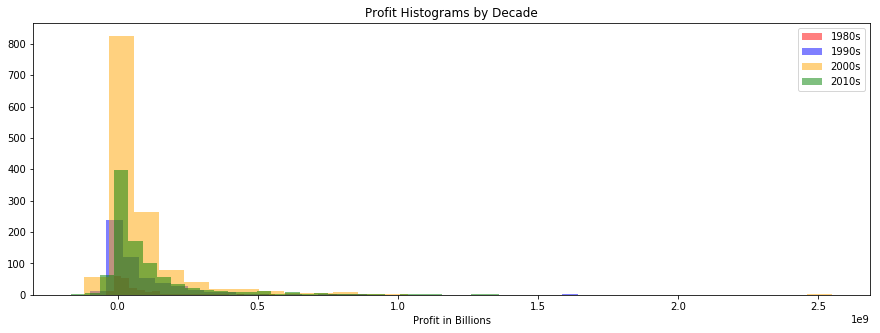

In [61]:
plt.figure(figsize=(15, 5))

plt.hist(money80['profit'], bins=30, color='red', alpha=.5, label='1980s')
plt.hist(money90['profit'], bins=30, color='b', alpha=.5, label='1990s')
plt.hist(money00['profit'], bins=30, color='orange', alpha=.5, label='2000s')
plt.hist(money10['profit'], bins=30, color='green', alpha=.5, label='2010s')
plt.title('Profit Histograms by Decade')
plt.xlabel('Profit in Billions')
plt.legend(loc='upper right') 

plt.show()

By using a t-test to compare profits by decade, we see numerical evidence there is little difference in the profits over time.  A histogram by decade provides a visual representation of this conclusion - here we see that profits do look simiilar from one decade to the next.  While the high end of profits shows variety over the decades, the vast majority of films continue to show profits in the same range under $100 Million. 

## Further Research

It might be interesting to look at the larger social context of these films and how the frequency of genres might be affected by historical events.  Then connecting those events to the profitability of genres.  
How do historically significant events affect what types of films are made?
How to these events impact profitability of films?  
How is that potential impact evident across genres?